# **Data Cleaning Main Datavista and Area Dataset**

This is the initial stage of developing a room pricing model, where data reading and cleaning will be carried out from the main datavista and also the area dataset. First we can import all used packages and libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [84]:
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=FutureWarning)

### **Data Wrangling**

**Gathering Data**



In this stage, the datasets, namely datavista and area are collected and then we will read the datasets using pandas library.

In [85]:
main_df = pd.read_csv("main.csv", delimiter=",")
main_df.head()

,property_id,unit_id,average_baseline_price,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,...,wifi,workspace,lat,lng,property_name,property_direction,property_type,property_design,area_id,distance_to_coastline
0,PR0017,UN0026,3.825851e+05,1,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,1.0,-8.656211,115.132867,Double D Guest House,"Double''D Guest House, Jalan Nelayan, Canggu, ...",4.0,0.0,A0003,NaN
1,PR0045,UN1518,4.847391e+05,1,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,-8.698719,115.163846,Melin Inn,"Melin Inn, Legian, Kabupaten Badung, Bali",3.0,0.0,A0015,NaN
2,PR0051,UN1471,7.079566e+05,3,2.0,3.0,6.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,Omah JeTeHa,"Jl. Sorowajan Baru, perum Jogja Town House 3 n...",1.0,0.0,A0044,NaN
3,PR0055,UN1417,7.403196e+05,3,2.0,3.0,7.0,1.0,1.0,0.0,...,0.0,1.0,-7.831766,110.380636,Griya Wirosaban,"Jl. Ki Ageng Pemanahan, Kragilan, Tamanan, Kec...",1.0,0.0,A0001,NaN
4,PR0065,UN1392,2.154133e+06,8,8.0,8.0,6.0,1.0,0.0,0.0,...,1.0,1.0,NaN,NaN,Pendopo 26,NaN,2.0,0.0,A0001,NaN


In [86]:
main_df.shape

(357, 40)

After reading the dataset, it is found that this data has a total of 40 features and 357 rows. Then, in the same way, we will also apply this to the arecodes dataset.

In [87]:
areacodes_df = pd.read_csv("areacodes.csv", delimiter=",")
areacodes_df.head()

,area_id,area_name,area_squad,employee_id,created_at,updated_at,deleted_at,temp_column,area_distance_to_airport,airport_pickup_price_idr,area_airport_name,region_id
0,A0000,Undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0001,Yogyakarta,3.0,E0028,NaN,2023-05-17 04:14,NaN,NaN,30 minutes,NaN,Adi Sucipto (JOG),2.0
2,A0002,Uluwatu,2.0,E0015,NaN,2022-10-07 06:34,NaN,NaN,1 hour,325000.0,Ngurah Rai (DPS),1.0
3,A0003,Canggu,2.0,E0014,NaN,2022-10-07 06:34,NaN,NaN,1 hour,325000.0,Ngurah Rai (DPS),1.0
4,A0004,Ubud,2.0,E0042,NaN,2022-10-07 06:34,NaN,NaN,2 hours,585000.0,Ngurah Rai (DPS),1.0


In [88]:
areacodes_df.shape

(54, 12)

It can be seen that the areacodes dataset has 54 area IDs and also has 12 features.

### **Assessing Data**

This is a process that aimed to identifying some issues related to data quality and we want to see the information of the data.

In [89]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_id             357 non-null    object 
 1   unit_id                 357 non-null    object 
 2   average_baseline_price  357 non-null    float64
 3   bedroom                 357 non-null    int64  
 4   bathroom                124 non-null    float64
 5   beds                    124 non-null    float64
 6   capacity                117 non-null    float64
 7   ac                      123 non-null    float64
 8   balcony                 123 non-null    float64
 9   beachfront              123 non-null    float64
 10  breakfast               123 non-null    float64
 11  building_staff          123 non-null    float64
 12  cable_tv                123 non-null    float64
 13  essentials              123 non-null    float64
 14  garden                  123 non-null    fl

We see that the data types from main dataset is correct, so we don't need to change the datatypes. Next, we will access info from areacodes dataset using info() function.

In [90]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   created_at                33 non-null     object 
 5   updated_at                30 non-null     object 
 6   deleted_at                0 non-null      float64
 7   temp_column               0 non-null      float64
 8   area_distance_to_airport  18 non-null     object 
 9   airport_pickup_price_idr  20 non-null     float64
 10  area_airport_name         20 non-null     object 
 11  region_id                 42 non-null     float64
dtypes: float64(5), object(7)
memory usage: 5.2+ KB


From information above, we conclude that we will change the dtypes of deleted_at and temp_column to object dtype and also we want to convert the area_distance_to_airport datatype to float64. But if we concern about data info, we realize that there is no data in deleted_at and temp_column, so we are going to drop these columns from areacodes_df


In [91]:
columns = ["deleted_at","temp_column"]
areacodes_df = areacodes_df.drop(columns,axis=1)

Next we will check it again using info() function

In [92]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   created_at                33 non-null     object 
 5   updated_at                30 non-null     object 
 6   area_distance_to_airport  18 non-null     object 
 7   airport_pickup_price_idr  20 non-null     float64
 8   area_airport_name         20 non-null     object 
 9   region_id                 42 non-null     float64
dtypes: float64(3), object(7)
memory usage: 4.3+ KB


We have successfully deleted some columns from dataset and next we will change the datatype of area_distance_to_airport into float64 dtype and before convert dtype we can make function to change the data into minutes.

In [93]:
def convert_time_to_minutes(time_str):
    if isinstance(time_str, str):
        if 'minute' in time_str:
            return float(time_str.split()[0])
        elif 'hour' in time_str:
            return float(time_str.split()[0]) * 60
        else:
            raise ValueError(f"Unknown time format: {time_str}")
    elif isinstance(time_str, float) and np.isnan(time_str):
        return np.nan
    else:
        raise TypeError(f"Expected string or NaN, got {type(time_str)}")

Next we can implement that function.

In [94]:
column = ["area_distance_to_airport"]

for c in column:
  areacodes_df[c] =  areacodes_df[c].apply(convert_time_to_minutes).astype('float64')

Next we can check the data info and data conversion

In [95]:
areacodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_id                   54 non-null     object 
 1   area_name                 54 non-null     object 
 2   area_squad                53 non-null     float64
 3   employee_id               22 non-null     object 
 4   created_at                33 non-null     object 
 5   updated_at                30 non-null     object 
 6   area_distance_to_airport  18 non-null     float64
 7   airport_pickup_price_idr  20 non-null     float64
 8   area_airport_name         20 non-null     object 
 9   region_id                 42 non-null     float64
dtypes: float64(4), object(6)
memory usage: 4.3+ KB


In [97]:
areacodes_df.head()

,area_id,area_name,area_squad,employee_id,created_at,updated_at,area_distance_to_airport,airport_pickup_price_idr,area_airport_name,region_id
0,A0000,Undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0001,Yogyakarta,3.0,E0028,NaN,2023-05-17 04:14,30.0,NaN,Adi Sucipto (JOG),2.0
2,A0002,Uluwatu,2.0,E0015,NaN,2022-10-07 06:34,60.0,325000.0,Ngurah Rai (DPS),1.0
3,A0003,Canggu,2.0,E0014,NaN,2022-10-07 06:34,60.0,325000.0,Ngurah Rai (DPS),1.0
4,A0004,Ubud,2.0,E0042,NaN,2022-10-07 06:34,120.0,585000.0,Ngurah Rai (DPS),1.0


Next we will check is there any duplicates in main and areacodes dataframe.

In [98]:
print("Main data duplicate count: ",main_df.duplicated().sum())
print("Areacodes data duplicate count: ",areacodes_df.duplicated().sum())

Main data duplicate count:  0
Areacodes data duplicate count:  0


After checking, it can be determined that both datasets do not have duplicates. Next we will check null values from both datasets.

In [99]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                  233
beds                      233
capacity                  240
ac                        234
balcony                   234
beachfront                234
breakfast                 234
building_staff            234
cable_tv                  234
essentials                234
garden                    234
gym                       234
hair_dryer                234
hanger                    234
heating                   234
hot_water                 234
kitchen                   234
linens                    234
lock                      234
luggage_drop_off          234
parking                   234
pool                      234
private_entrance          234
shampoo                   234
tv                        234
washer                    234
wifi                      234
workspace                 234
lat                       244
lng       

From the main dataset,we can see that many missing values are found.

In [100]:
areacodes_df.isna().sum()

area_id                      0
area_name                    0
area_squad                   1
employee_id                 32
created_at                  21
updated_at                  24
area_distance_to_airport    36
airport_pickup_price_idr    34
area_airport_name           34
region_id                   12
dtype: int64

From the areacodes dataset, it can be seen that the column with the most missing values is area_distance_to_airport, with a total of 36 missing values.

In [105]:
main_df.describe()

,average_baseline_price,bedroom,bathroom,beds,capacity,ac,balcony,beachfront,breakfast,building_staff,...,shampoo,tv,washer,wifi,workspace,lat,lng,property_type,property_design,distance_to_coastline
count,3.570000e+02,357.000000,124.00000,124.000000,117.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,113.000000,113.000000,356.000000,355.000000,33.000000
mean,1.083664e+06,2.291317,1.58871,1.612903,3.162393,0.983740,0.495935,0.113821,0.439024,0.211382,...,0.682927,0.666667,0.105691,0.975610,0.869919,-8.648274,114.412454,3.157303,0.960563,1732.067330
std,1.064922e+06,1.217502,1.21650,1.194225,2.025515,0.126992,0.502028,0.318893,0.498298,0.409959,...,0.467239,0.473333,0.308699,0.154888,0.337769,0.292948,3.635156,1.195285,1.521455,3110.250551
min,1.218643e+05,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-8.837896,79.230512,1.000000,0.000000,15.603500
25%,4.143750e+05,1.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-8.809042,115.113573,2.000000,0.000000,121.038000
50%,7.123804e+05,2.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,-8.784648,115.131820,4.000000,0.000000,761.362000
75%,1.363969e+06,3.000000,2.00000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,-8.653643,115.154710,4.000000,1.000000,2033.490000
max,8.677478e+06,8.000000,8.00000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-7.728722,115.586846,5.000000,5.000000,14402.100000


After seeing the description of the main data, the next step is to handle missing values ​​by dropping data that has a property_design feature value of null.

In [106]:
main_df = main_df.dropna(subset=['property_design'])

Next we check again the null value every features

In [107]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                  231
beds                      231
capacity                  238
ac                        232
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

Since there are quite a lot of missing values in several features in the main dataset, the next step is to look at the correlation matrix to understand the relationships between the features.

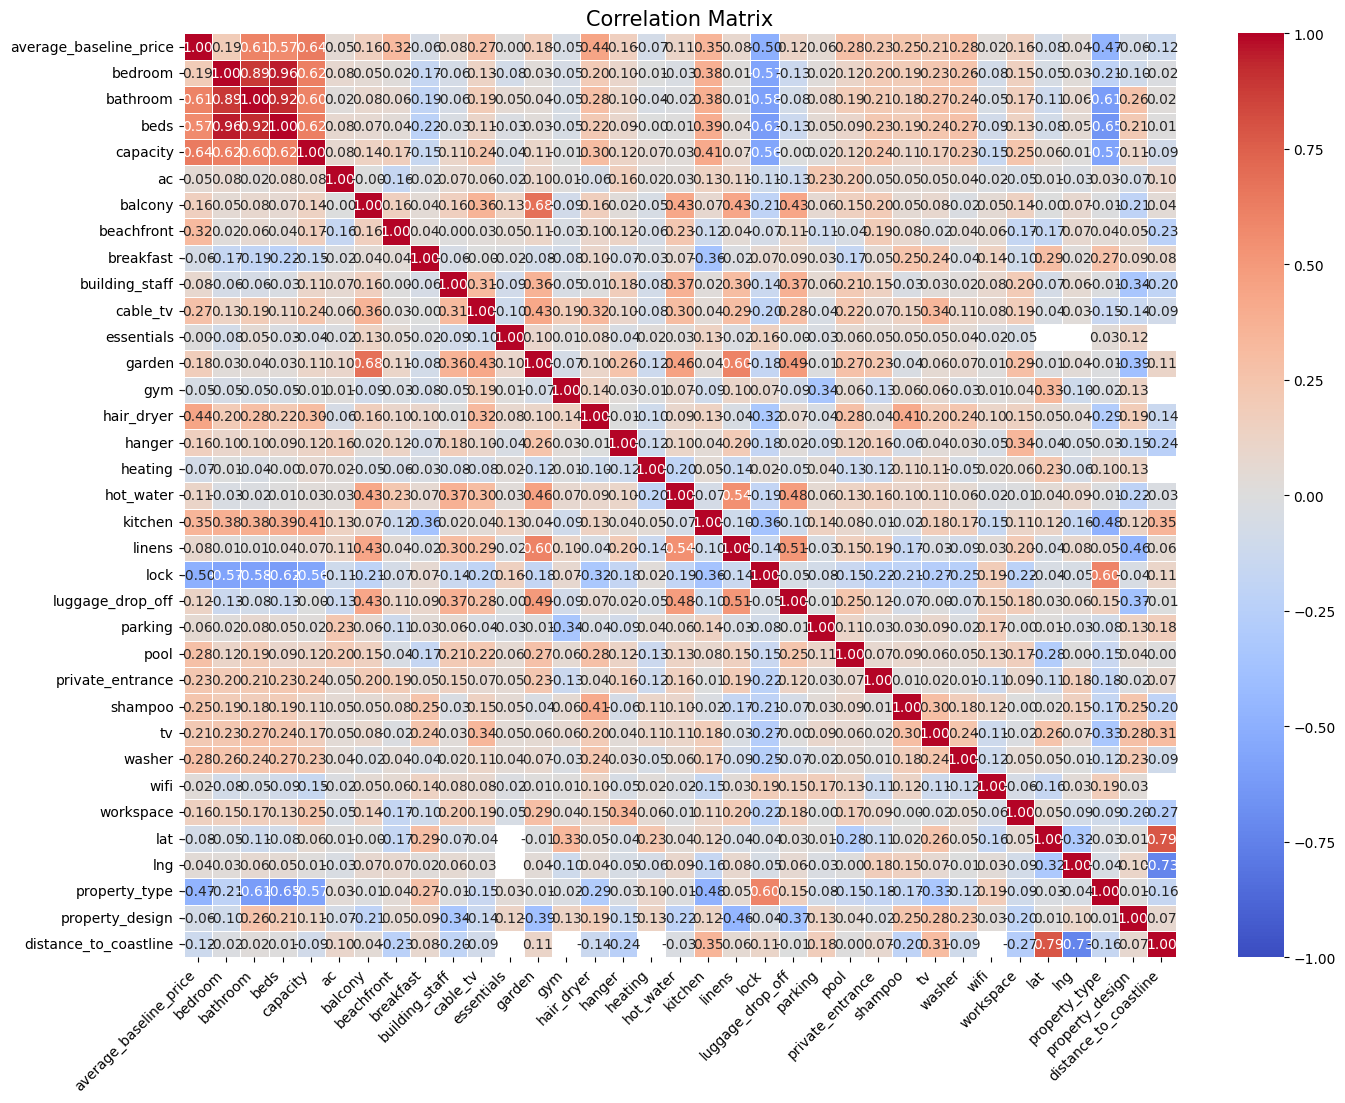

In [108]:
numeric_df = main_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 10}
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Correlation Matrix', fontsize=15)
plt.show()


Next, we check features that have a fairly high correlation with a threshold of 0.5

In [109]:
threshold = 0.5
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iat[x, y])
                   for x, y in zip(*high_corr) if x != y and x < y]

for pair in high_corr_pairs:
    print(f" {pair[0]} and {pair[1]} {pair[2]:.2f}")


 average_baseline_price and bathroom 0.61
 average_baseline_price and beds 0.57
 average_baseline_price and capacity 0.64
 bedroom and bathroom 0.89
 bedroom and beds 0.96
 bedroom and capacity 0.62
 bedroom and lock -0.57
 bathroom and beds 0.92
 bathroom and capacity 0.60
 bathroom and lock -0.58
 bathroom and property_type -0.61
 beds and capacity 0.62
 beds and lock -0.62
 beds and property_type -0.65
 capacity and lock -0.56
 capacity and property_type -0.57
 balcony and garden 0.68
 garden and linens 0.60
 hot_water and linens 0.54
 linens and luggage_drop_off 0.51
 lock and property_type 0.60
 lat and distance_to_coastline 0.79
 lng and distance_to_coastline -0.73


Next, we will fill in the missing values ​​for beds based on features that have a high correlation, namely bedrooms.

In [110]:
train_data = main_df.dropna(subset=['beds', 'bedroom'])
predict_data = main_df[main_df['beds'].isnull() & main_df['bedroom'].notnull()]

X_train = train_data[['bedroom']]
y_train = train_data['beds']

model = LinearRegression()
model.fit(X_train, y_train)

X_predict = predict_data[['bedroom']]
predict_data['beds'] = np.round(model.predict(X_predict))

main_df.loc[main_df['beds'].isnull() & main_df['bedroom'].notnull(), 'beds'] = predict_data['beds']

Next we can check null values from dataset.

In [111]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                  231
beds                        0
capacity                  238
ac                        232
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

Selanjutnya adalah mengisi null value bathroom dengan prediksi atribut yang memiliki korelasi tertinggi yaitu beds.

In [112]:
train_data = main_df.dropna(subset=['bathroom'])

X_train = train_data[['beds']]
y_train = train_data['bathroom']

model = LinearRegression()
model.fit(X_train, y_train)

X_missing = main_df[main_df['bathroom'].isnull()][['beds']]
predicted_bathroom = np.round(model.predict(X_missing))

main_df.loc[main_df['bathroom'].isnull(), 'bathroom'] = predicted_bathroom

Selanjutnya kita bisa mengecek nilai null pada dataset main.

In [113]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                  238
ac                        232
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

In [114]:
predictors = ['average_baseline_price', 'bedroom', 'bathroom', 'beds','property_type']

train_data = main_df.dropna(subset=predictors + ['capacity'])

X_train = train_data[predictors]
y_train = train_data['capacity']

model = LinearRegression()
model.fit(X_train, y_train)

predict_data = main_df[main_df['capacity'].isnull() & main_df[predictors].notnull().all(axis=1)]

if not predict_data.empty:
    X_predict = predict_data[predictors]
    predicted_capacity = model.predict(X_predict)
    main_df.loc[main_df['capacity'].isnull() & main_df[predictors].notnull().all(axis=1), 'capacity'] = np.round(predicted_capacity)



In [118]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                        232
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

In [119]:
unique_ac_values = main_df['ac'].unique()
print(unique_ac_values)

[ 1.  0. nan]


Karena data ac sifatnya adalah categorical data maka kita akan mengisi dengan undefined

In [120]:
main_df['ac'].fillna('undefined', inplace=True)

In [121]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                          0
balcony                   232
beachfront                232
breakfast                 232
building_staff            232
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

In [122]:
unique_ac_values = main_df['balcony'].unique()
print(unique_ac_values)

[ 1.  0. nan]


In [123]:
main_df['balcony'].fillna('undefined', inplace=True)

In [125]:
unique_ac_values = main_df['beachfront'].unique()
print(unique_ac_values)

[0.0 1.0 'undefined']


In [126]:
unique_ac_values = main_df['breakfast'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [127]:
unique_ac_values = main_df['building_staff'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [128]:
main_df['breakfast'].fillna('undefined', inplace=True)

In [129]:
main_df['building_staff'].fillna('undefined', inplace=True)

In [130]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                          0
balcony                     0
beachfront                  0
breakfast                   0
building_staff              0
cable_tv                  232
essentials                232
garden                    232
gym                       232
hair_dryer                232
hanger                    232
heating                   232
hot_water                 232
kitchen                   232
linens                    232
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

In [131]:
unique_ac_values = main_df['cable_tv'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [141]:
main_df['cable_tv'].fillna('undefined', inplace=True)

In [132]:
unique_ac_values = main_df['essentials'].unique()
print(unique_ac_values)

[ 1.  0. nan]


In [142]:
main_df['essentials'].fillna('undefined', inplace=True)

In [133]:
unique_ac_values = main_df['garden'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [143]:
main_df['garden'].fillna('undefined', inplace=True)

In [134]:
unique_ac_values = main_df['gym'].unique()
print(unique_ac_values)

[ 0. nan  1.]


In [144]:
main_df['gym'].fillna('undefined', inplace=True)

In [135]:
unique_ac_values = main_df['hair_dryer'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [145]:
main_df['hair_dryer'].fillna('undefined', inplace=True)

In [136]:
unique_ac_values = main_df['hanger'].unique()
print(unique_ac_values)

[ 1.  0. nan]


In [146]:
main_df['hanger'].fillna('undefined', inplace=True)

In [137]:
unique_ac_values = main_df['heating'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [147]:
main_df['heating'].fillna('undefined', inplace=True)

In [138]:
unique_ac_values = main_df['hot_water'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [148]:
main_df['hot_water'].fillna('undefined', inplace=True)

In [139]:
unique_ac_values = main_df['kitchen'].unique()
print(unique_ac_values)

[ 1.  0. nan]


In [149]:
main_df['kitchen'].fillna('undefined', inplace=True)

In [140]:
unique_ac_values = main_df['linens'].unique()
print(unique_ac_values)

[ 0.  1. nan]


In [150]:
main_df['linens'].fillna('undefined', inplace=True)

In [151]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                          0
balcony                     0
beachfront                  0
breakfast                   0
building_staff              0
cable_tv                    0
essentials                  0
garden                      0
gym                         0
hair_dryer                  0
hanger                      0
heating                     0
hot_water                   0
kitchen                     0
linens                      0
lock                      232
luggage_drop_off          232
parking                   232
pool                      232
private_entrance          232
shampoo                   232
tv                        232
washer                    232
wifi                      232
workspace                 232
lat                       242
lng       

In [153]:
unique_ac_values = main_df['lock'].unique()
print(unique_ac_values)

unique_ac_values = main_df['luggage_drop_off'].unique()
print(unique_ac_values)

unique_ac_values = main_df['parking'].unique()
print(unique_ac_values)

unique_ac_values = main_df['pool'].unique()
print(unique_ac_values)

unique_ac_values = main_df['private_entrance'].unique()
print(unique_ac_values)

unique_ac_values = main_df['shampoo'].unique()
print(unique_ac_values)

unique_ac_values = main_df['tv'].unique()
print(unique_ac_values)

unique_ac_values = main_df['washer'].unique()
print(unique_ac_values)

unique_ac_values = main_df['wifi'].unique()
print(unique_ac_values)

unique_ac_values = main_df['workspace'].unique()
print(unique_ac_values)

[ 1.  0. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 1.  0. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 1.  0. nan]
[ 1.  0. nan]


In [155]:
main_df['lock'].fillna('undefined', inplace=True)
main_df['luggage_drop_off'].fillna('undefined', inplace=True)
main_df['parking'].fillna('undefined', inplace=True)
main_df['pool'].fillna('undefined', inplace=True)
main_df['private_entrance'].fillna('undefined', inplace=True)
main_df['shampoo'].fillna('undefined', inplace=True)
main_df['tv'].fillna('undefined', inplace=True)
main_df['washer'].fillna('undefined', inplace=True)
main_df['wifi'].fillna('undefined', inplace=True)
main_df['workspace'].fillna('undefined', inplace=True)

In [156]:
main_df.isna().sum()

property_id                 0
unit_id                     0
average_baseline_price      0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
ac                          0
balcony                     0
beachfront                  0
breakfast                   0
building_staff              0
cable_tv                    0
essentials                  0
garden                      0
gym                         0
hair_dryer                  0
hanger                      0
heating                     0
hot_water                   0
kitchen                     0
linens                      0
lock                        0
luggage_drop_off            0
parking                     0
pool                        0
private_entrance            0
shampoo                     0
tv                          0
washer                      0
wifi                        0
workspace                   0
lat                       242
lng       